## Importing Libraries 

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Reading Dataset 

In [13]:
#Reading the dataset.
data = pd.read_csv("AB_NYC_2019.csv")

In [14]:
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19-10-2018   
1  Entire home/apt    225               1                 45  21-05-2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  05-07-2019   
4  Entire home/apt     80              10                  9  19-11-2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [16]:
data.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [17]:
data.shape

(48895, 16)

In [18]:
data.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [19]:
data.duplicated().sum()

0

## Handling missing values

In [20]:
#null or missing values in the dataset.
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### 
1. Missing values are present in the name, host_name, last_reviews and reviews_per_month columns.
2. In the above exploration part we can see that if the null value count in number_of_reviews column is 0, NaN in last_review and reviews_per_month doesn't add any information.

In [21]:
data[['number_of_reviews','reviews_per_month']][data['reviews_per_month'].isnull()].head()

number_of_reviews  reviews_per_month
2                   0                NaN
19                  0                NaN
26                  0                NaN
36                  0                NaN
38                  0                NaN

#### 
We can see thats when thw number_of_reviews is 0, the last_review and review_per_month is NaN. 

In [22]:
assumption_test.shape

NameError: name 'assumption_test' is not defined

#### 
The exact amount of null values present in both the columns. 
We will substitute 0 for the missing values present in reviews_per_month column.

As for the last_review column we know that it is a datetime object of the pandas and substituting 0 is not possible.

In [23]:
#filling the missing values in reviews_per_month with 0.
data.reviews_per_month.fillna(0, inplace=True)

In [24]:
#Checking if the changes made are reflected.
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [25]:
data.last_review.fillna(method="ffill",inplace=True)
data.last_review.isnull().sum()

0

In [26]:
data.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

array([[<AxesSubplot:title={'center':'reviews_per_month'}>]], dtype=object)

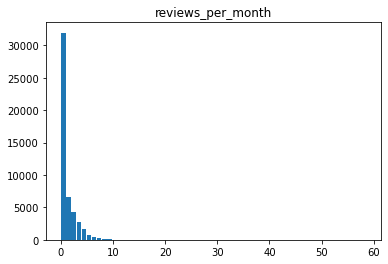

In [27]:
data.hist(column='reviews_per_month',bins=60,grid=False,rwidth=0.9)

## Exploratory Data Analysis (EDA)

### Categorical Variables

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64


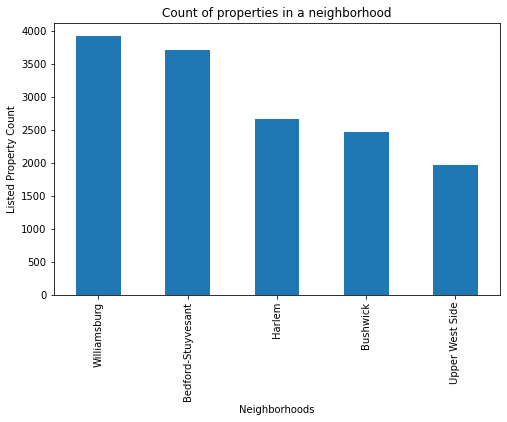

In [28]:
#checking the to 5 neighborhood where the properties are listed most.
top_5_neighborhoods = data.neighbourhood.value_counts().head(5)
print(top_5_neighborhoods)

#plotting 
plt.figure(figsize=(8,5))
top_5_neighborhoods.plot.bar()
plt.xlabel('Neighborhoods')
plt.ylabel('Listed Property Count')
plt.title('Count of properties in a neighborhood')
plt.show() #optional

The top 5 neighborhoods whcih have the highest number of properties listed are shown above.
We can see that Williamsburg has the highest number of properties listed (3920) followed by Bedford-Stuyvesant (3714).

As Williamsburg has the highest number of properties listed then the Brooklyn neighborhood group must also have the highest number of properties listed as williamburg comes under brooklyn neighborhood group.

Lets check if this is correct or not.

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


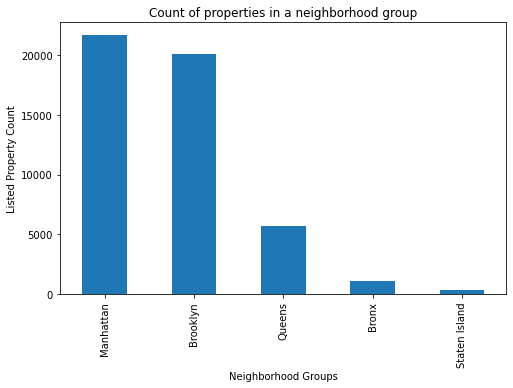

In [29]:
#checking the to 5 neighborhood groups where the properties are listed most.
top_5_neighborhood_group = data.neighbourhood_group.value_counts()
print(top_5_neighborhood_group)

#plotting 
plt.figure(figsize=(8,5))
top_5_neighborhood_group.plot.bar()
plt.xlabel('Neighborhood Groups')
plt.ylabel('Listed Property Count')
plt.title('Count of properties in a neighborhood group')
plt.show() #optional

Our assumption was wrong. As it turned out that Manhattan has the higghest number of properties listed although Williamsburg town in Brooklyn had the highest number of properties amongh the neighbor towns.

This infers that there are many other towns in Manhattan that have properties listed and that is why Manhattan neighborhood as a whole has the highest number of properties.

We can also see that other neighborhood groups such as Queens, Bronx and Staten Island contribute less compared to Manhattan and Brooklyn.

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


/Users/sukeerthig/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='count'>

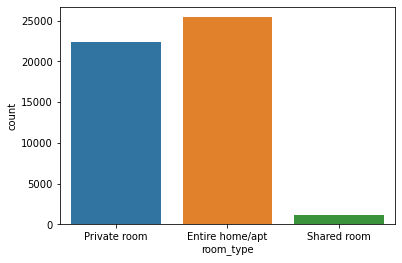

In [30]:
#number of rooms_type provided by the hosts
print(data.room_type.value_counts())
sns.countplot(data.room_type)

There are 3 room type provided by the host. Most of the rooms provided are private rooms and Entire home or apartments type.

Share rooms are listed very few, as it make sense that people travelling with family will prefer the top 2 room types rather than sharing.

For the Room Type, ther are 3 types of values which are private room, entire home/ apt and shared room. Entire home/apt leads the column with 25000, followed by private room then shared room. There are 5 types of neighbourhood group which are Brooklyn, Manhattan, Queens, Staten Island, and Bronx. Manhattan leads, followed by Brooklyn and Queens. For the neighborhoud variable, there are too many unique values in the variable, thus it is not possible to plot a graph on the values, and it will not be readable as well.

/Users/sukeerthig/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

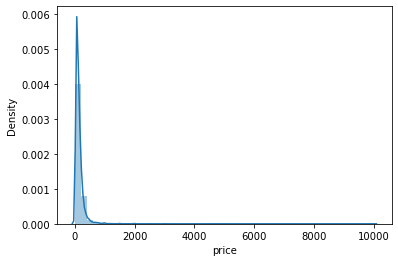

In [31]:
#Lets check the distribution of the price of the properties.
sns.distplot(data.price, bins=50)

The distribution of price is heavily left skewed. Meaning the most of the properties price are between 0 - 2000 and some minority of the properties are having prices grator than that making the data to be skewed.

Also we saw that some properties have a price as 0 and that could not be possible here as no one will be giving their property on rent for free! That will be absurd.

In [32]:
#Looking into the properties having 0 Price
free_properties = data.loc[data.price <= 0]
print('Shape of the data:', free_properties.shape)
free_properties.head()

Shape of the data: (11, 16)


id                                               name    host_id  \
23161  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25634  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25753  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
25778  20624541      Modern apartment in the heart of Williamsburg   10132166   

          host_name neighbourhood_group       neighbourhood  latitude  \
23161      Kimberly            Brooklyn  Bedford-Stuyvesant  40.69023   
25433        Anisha               Bronx     East Morrisania  40.83296   
25634  Martial Loft            Brooklyn            Bushwick  40.69467   
25753        Lauren            Brooklyn          Greenpoint  40.72462   
25778       Aymeric            Brooklyn        Williamsburg  40.70838   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
23161  -73.95428     Private room      0               4                  1   
25433  -73.88668     Private room      0               2                 55   
25634  -73.92433     Private room      0               2                 16   
25753  -73.94072     Private room      0               2                 12   
25778  -73.94645  Entire home/apt      0               5                  3   

      last_review  reviews_per_month  calculated_host_listings_count  \
23161  06-01-2018               0.05                               4   
25433  24-06-2019               2.56                               4   
25634  18-05-2019               0.71                               5   
25753  27-10-2017               0.53                               2   
25778  02-01-2018               0.15                               1   

       availability_365  
23161                28  
25433               127  
25634                 0  
25753                 0  
25778                73

11 properties have are having 0 price. Assuming this to be a mistake or error from the Airbnb side, we will have to impute the prices according.

One way to impute will be by taking the mean, but as we saw earlier the price distribution is highly skewed and hence that will affect the mean of the price.

Presence of outliers or extreme values in the dataset effect the mean of the data and is not a good option to impute. Other method is to impute the data with mediian as median is less affected by outliers/extreme values.

The other effective way will be to see the affect of price or the relation of price on various other factors in the dataset and come up with a formula or a model that will do the imputation for us.
We will look into this later.

/Users/sukeerthig/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='minimum_nights', ylabel='Density'>

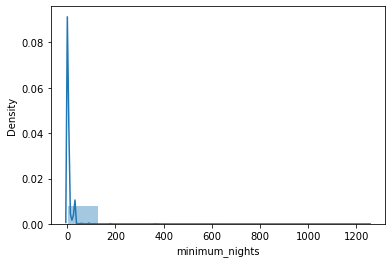

In [33]:
#minimum number of nights allowed by the host.
sns.distplot(data.minimum_nights, bins=10)

The minimum nights goes from 1 to 1200+. Only 1 host provide minimum_nights to be 1200+. We come to know from the distribution that the data is skewed.

Now let's check which top 5 properties have recieved the highest number of reviewes.

In [34]:
#properties recieving highest reviews.
highest_reviews = data.sort_values(by='number_of_reviews', ascending=False)
highest_reviews.head()

id                            name   host_id host_name  \
11759   9145202         Room near JFK Queen Bed  47621202      Dona   
2031     903972      Great Bedroom in Manhattan   4734398        Jj   
2030     903947  Beautiful Bedroom in Manhattan   4734398        Jj   
2015     891117    Private Bedroom in Manhattan   4734398        Jj   
13495  10101135         Room Near JFK Twin Beds  47621202      Dona   

      neighbourhood_group neighbourhood  latitude  longitude     room_type  \
11759              Queens       Jamaica  40.66730  -73.76831  Private room   
2031            Manhattan        Harlem  40.82085  -73.94025  Private room   
2030            Manhattan        Harlem  40.82124  -73.93838  Private room   
2015            Manhattan        Harlem  40.82264  -73.94041  Private room   
13495              Queens       Jamaica  40.66939  -73.76975  Private room   

       price  minimum_nights  number_of_reviews last_review  \
11759     47               1                629  05-07-2019   
2031      49               1                607  21-06-2019   
2030      49               1                597  23-06-2019   
2015      49               1                594  15-06-2019   
13495     47               1                576  27-06-2019   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173

The above table shows the top 5 properties which have recieved the highest number of reviews. Out of the 5, three properties are from the Manhattan neighborhood group in Harlem.

The top property which has recieved the most reviews is from Queens in the neighborhood of Jamica. The property having 5th highest review is also from Queens.

Let us look at these properties and try to come up with some hypothesis on why these properties have the highest reviews.

These properties are the most popular properties among the others and that is why they may be getting more bookings and hence more reviews.
They come from the same host i.e Dona and JJ. May be they are a good and popular hosts that is why are recieving good amount of bookings and reviews.
The Dona host has her room near the JFK i.e nearer to the international airport and that's why the high amount of bookings.
All of them share the similar room type, i.e Private rooms. So we can assume that the private rooms are more popular than any other rooms.
The price is also almost similar of all the properties approx 50.
They all offer minimum 1 night stay which most of the people prefer as it is very flexible.
The availability of the rooms is also high with the top 4 having an availability rate of approx 300 days and +.

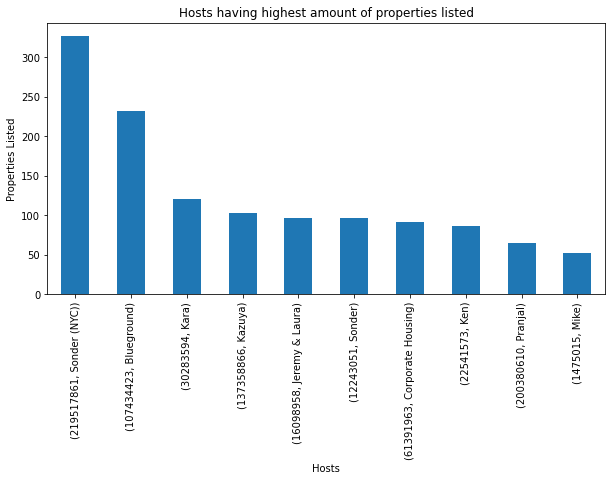

In [35]:
#host having highest amount of properties listed.
highest_props_host = data.groupby(['host_id', 'host_name'])['host_id'].count().sort_values(ascending=False)[:10]
highest_props_host.plot.bar(figsize=(10,5))
plt.xlabel('Hosts')
plt.ylabel('Properties Listed')
plt.title('Hosts having highest amount of properties listed');

We can see that Sonder(NYC) has the highest number of properties that are listed but his property was not in the top 5 highest reviews table we saw earlier.

This means that the number of properties listed on the Airbnb does not mean that the number of customers you will have will be more.

## Bivariate analysis

/Users/sukeerthig/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

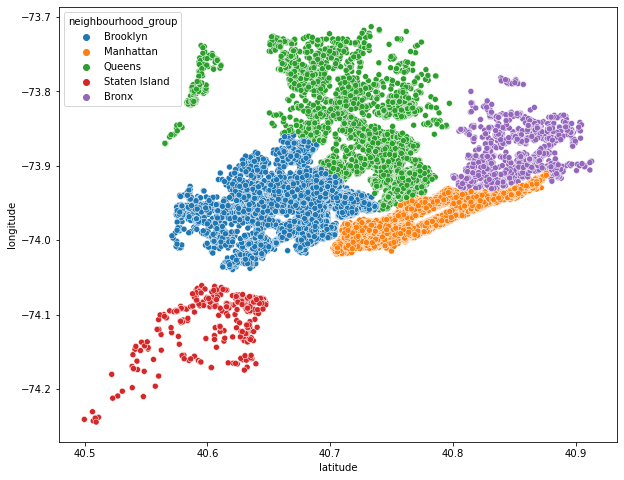

In [36]:
#neighborhood group based on the latitude and longitude
plt.figure(figsize=(10,8))
sns.scatterplot(data.latitude,data.longitude, hue='neighbourhood_group', data=data)

The above resemble the map of NYC and shows the various neighbourhoods and the properties listed in each neighbourhood.

/Users/sukeerthig/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

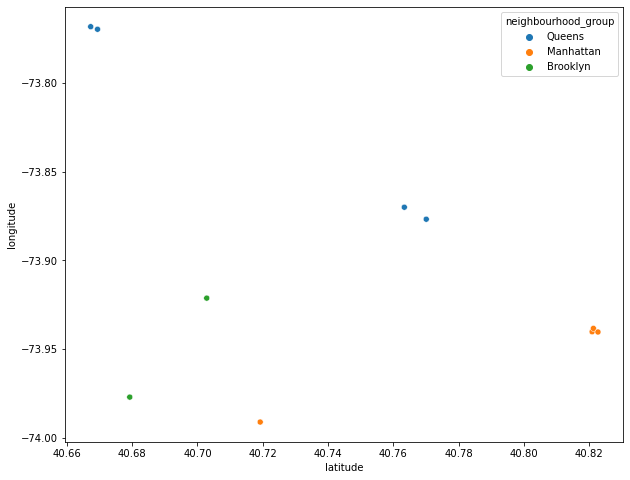

In [37]:
# #Properties in the neighbourhood with most reviews. 
plt.figure(figsize=(10,8))
sns.scatterplot('latitude', 'longitude', hue='neighbourhood_group', data=highest_reviews.head(10))

So far we have done some basic exploring of the dataset and have gain few insights from it such as:

Came to know that the price column had some irregularities such as the minimum price was 0$ which is not possible.
Missing values in the last_review column and reviews_per_month column were following a pattern. If number_of_reviews was 0 then these two columns had null values.
From the univariate analysis we came to know the top 5 neighbourhood whcih had the highest number of properties listed.
We also came to know the top neighbourhood groups which had the highest number of properties listed.
We came to know the top 5 properties which had the highest review and factors contibuting to their reviews.
We came to know that properties closer to the airport had a good number of reviews.
We saw the host which had the highest number of properties listed on Airbnb.
We saw the distribution of the properties based on the neighbourhood_group on a scatter plot.

/Users/sukeerthig/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


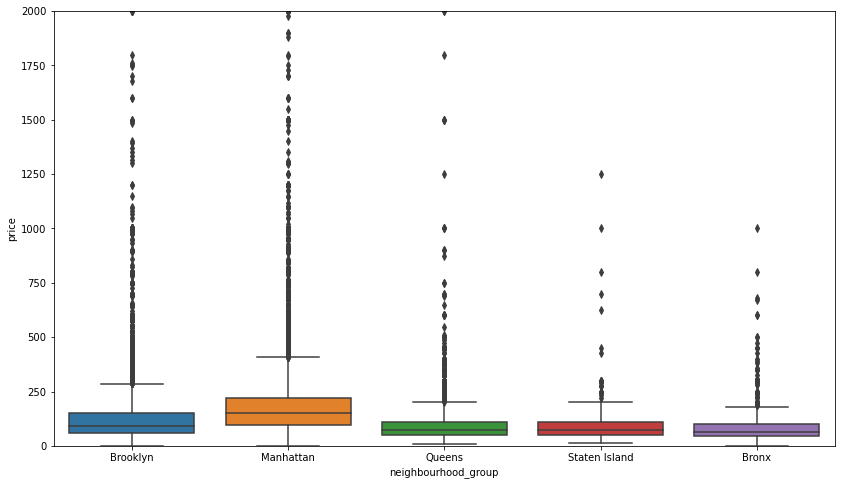

In [38]:
# Neighbourhood group and price
plt.figure(figsize=(14,8))
sns.boxplot(data.neighbourhood_group,data.price)
# sns.swarmplot(data.neighbourhood_group,data.price)
plt.ylim(0,2000)
plt.show()

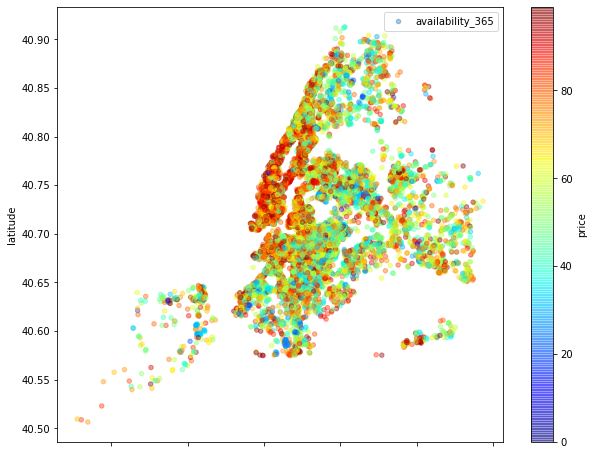

In [39]:
#Neighbourhood groups with price less than 100
sub_6=data[data.price < 100]
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

In [40]:
#Room types and associated prices(Size of bubbles)
fig = px.scatter_mapbox(data, 
                        lat="latitude", 
                        lon="longitude", 
                        color="room_type", 
                        size="price",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=30, 
                        opacity = .70,
                        zoom=11,
                       )
fig.layout.mapbox.style = 'carto-positron'
fig.update_layout(title_text = 'Room types and prices<br>(Click legend to toggle room types)', height = 800)

fig.show()

In [41]:
data.quantile([0.7,0.75,0.8,0.85,0.9,0.95,0.995,1])

id       host_id   latitude  longitude    price  \
0.700  27140739.60  8.082452e+07  40.756030 -73.941290    155.0   
0.750  29152178.50  1.074344e+08  40.763115 -73.936275    175.0   
0.800  30530272.40  1.371296e+08  40.770982 -73.927698    200.0   
0.850  32306597.20  1.695347e+08  40.787490 -73.919130    225.0   
0.900  33990939.60  2.128114e+08  40.804890 -73.907810    269.0   
0.950  35259101.20  2.417646e+08  40.825643 -73.865771    355.0   
0.995  36355802.18  2.703085e+08  40.873219 -73.754920   1000.0   
1.000  36487245.00  2.743213e+08  40.913060 -73.712990  10000.0   

       minimum_nights  number_of_reviews  reviews_per_month  \
0.700             4.0              17.00               1.18   
0.750             5.0              24.00               1.58   
0.800             6.0              33.00               2.00   
0.850             7.0              48.00               2.58   
0.900            28.0              70.00               3.25   
0.950            30.0             114.00               4.31   
0.995            90.0             256.53               7.97   
1.000          1250.0             629.00              58.50   

       calculated_host_listings_count  availability_365  
0.700                             2.0             179.0  
0.750                             2.0             227.0  
0.800                             3.0             272.0  
0.850                             3.0             311.0  
0.900                             5.0             337.0  
0.950                            15.0             359.0  
0.995                           327.0             365.0  
1.000                           327.0             365.0

In [42]:
# Understanding the numerical variable

df_num = data[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
df_num.describe().transpose()

count        mean         std  min    25%  \
price                           48895.0  152.720687  240.154170  0.0  69.00   
minimum_nights                  48895.0    7.029962   20.510550  1.0   1.00   
number_of_reviews               48895.0   23.274466   44.550582  0.0   1.00   
reviews_per_month               48895.0    1.090910    1.597283  0.0   0.04   
calculated_host_listings_count  48895.0    7.143982   32.952519  1.0   1.00   
availability_365                48895.0  112.781327  131.622289  0.0   0.00   

                                   50%     75%      max  
price                           106.00  175.00  10000.0  
minimum_nights                    3.00    5.00   1250.0  
number_of_reviews                 5.00   24.00    629.0  
reviews_per_month                 0.37    1.58     58.5  
calculated_host_listings_count    1.00    2.00    327.0  
availability_365                 45.00  227.00    365.0

#### 
Price: 
The mean value for price column is 152.72usd, median is at 106usd and the maximum price is 10000.00 which is clearly an outliers.

Minimum nights: 
The mean value for the minimum night is 7.03 days, while there are customers whom even stayed for 1250.00 days which is in this case, is an outliers.

Number of Reviews: 
For the number of reviews, the mean values lies in 23.27 reviews, median is at 5.00.

Reviews per Month: 
For the number of reviews per months, the mean of the variable is at 1.09 reviews, median is at 0.37 and max number of reviews is at 58.5.

Calculated host listing account: 
This is an amount of listing per host, in this variable, 7.14 listing is the mean value, and the mximum listing up to per host.

Availability 365: 
For the number of days when listing is available, the mean value is at 112.78 days, median is at 45 days and maximum days is 365.0 days.



<Figure size 1440x1440 with 0 Axes>

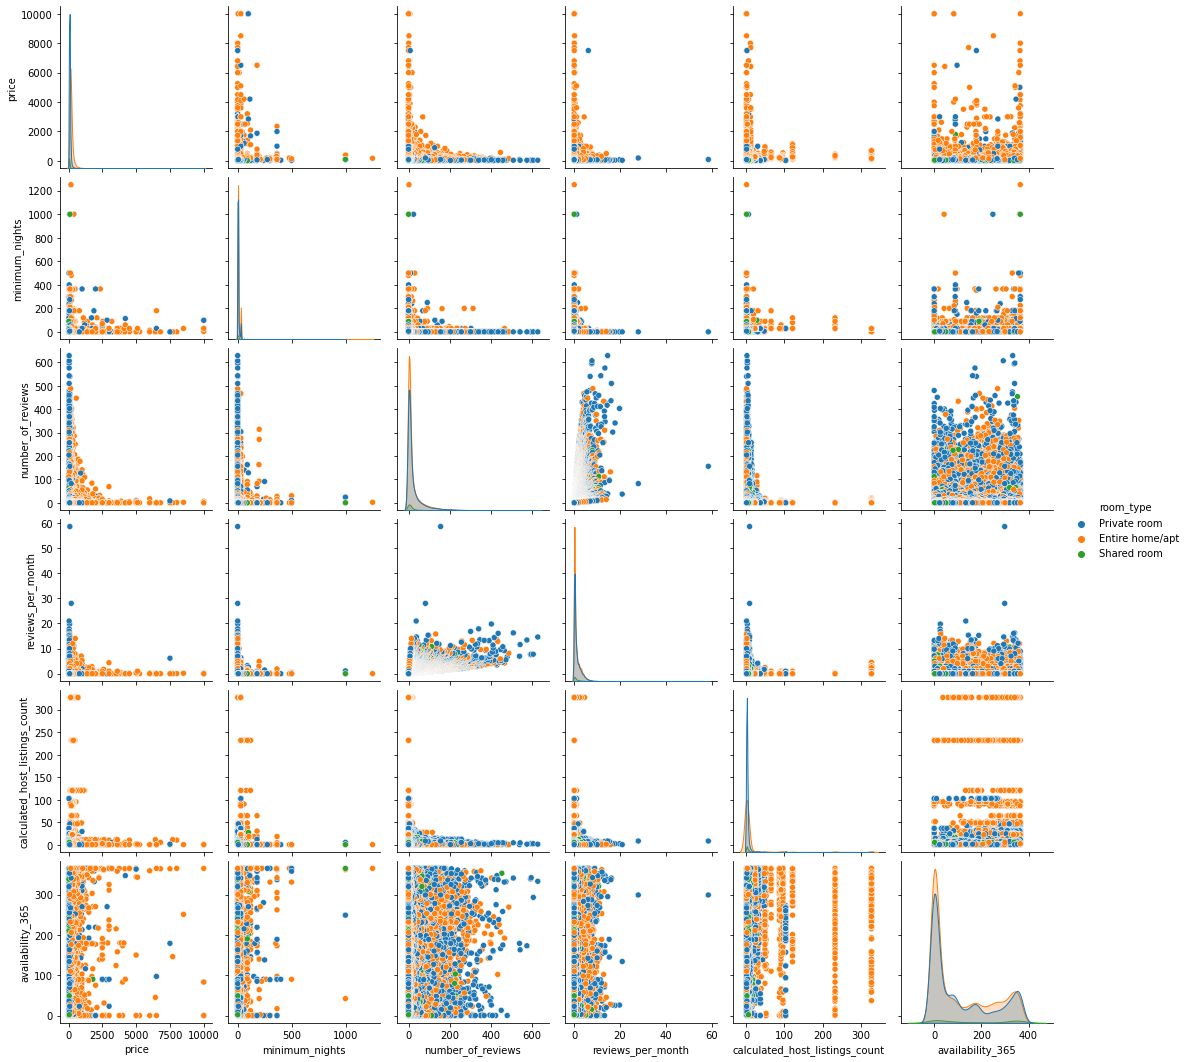

In [43]:
plt.figure(figsize=(20,20))
sns.pairplot(data[['price','minimum_nights','number_of_reviews','reviews_per_month',
                   'calculated_host_listings_count','availability_365','room_type']], hue="room_type")

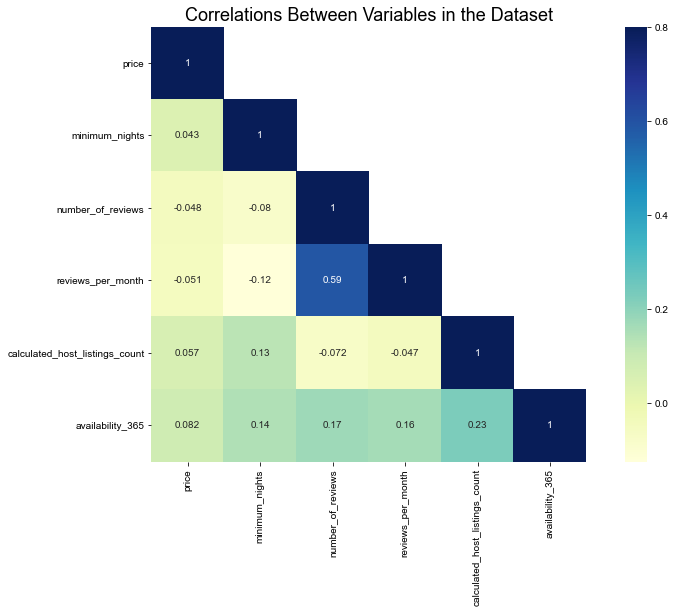

In [44]:
# Checking the correlation between variables

plt.figure(figsize=(14,8))
mask = np.array(df_num.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df_num.corr(), mask = mask, vmax = .8, square =  True, annot=True, cmap='YlGnBu')

sns.set_style('whitegrid')
sns.set_context('talk')
plt.title('Correlations Between Variables in the Dataset')
plt.show()

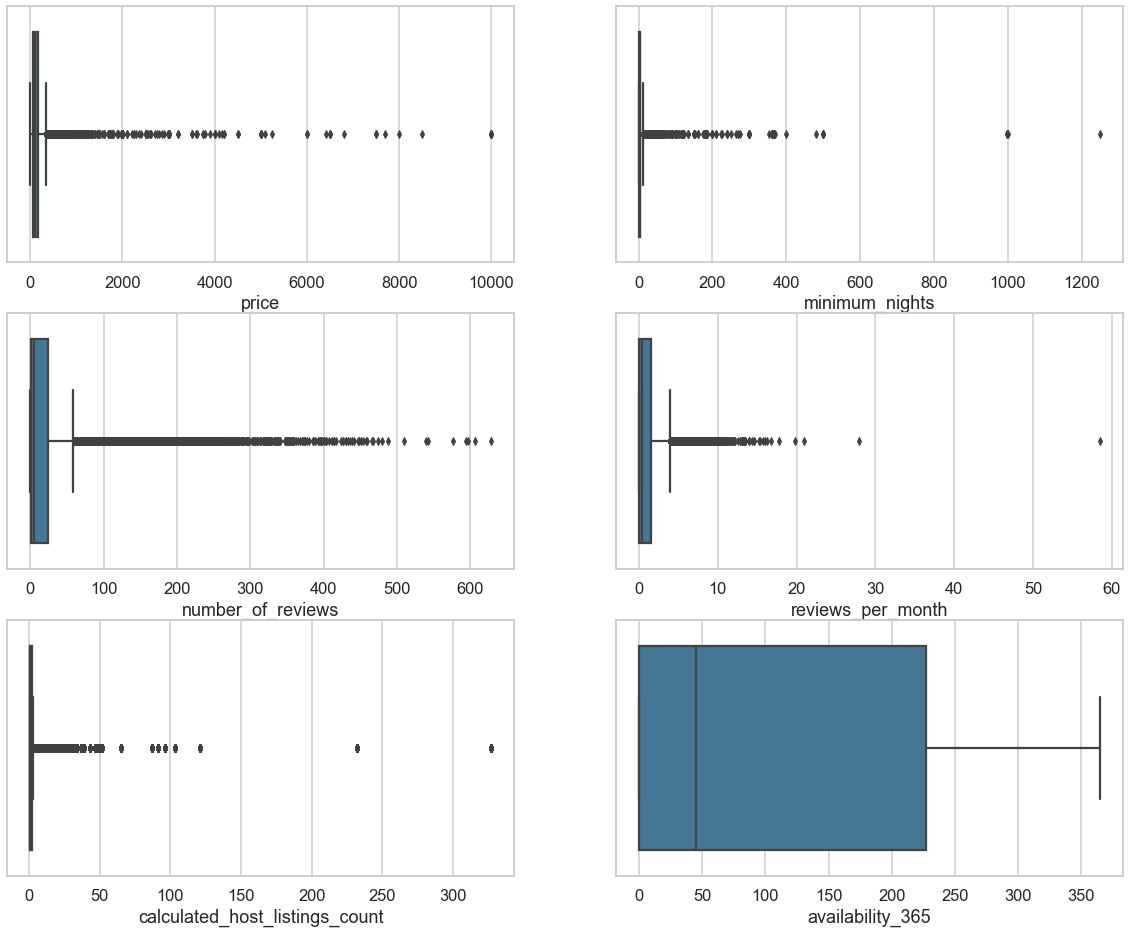

In [45]:
# Analysing outliers for numerical columms

plt.figure(figsize=(20,16))

for i in enumerate(df_num):
    plt.subplot(3,2, i[0]+1)
    sns.boxplot(x = i[1], data = data, palette='mako')


## Analyzing and treating outliers

### Price column

In [46]:
# Analysing the description

data['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

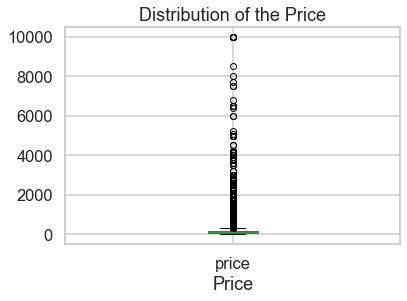

In [47]:
# Plotting boxplot to see the distribution of the data in the column

data.boxplot(column = 'price')

plt.xlabel('Price')
plt.title('Distribution of the Price')

plt.show()

In [48]:
# Binning the price column

data['price'].quantile([0,0.25,0.50,0.75,0.90,0.95,0.99,0.997])

0.000       0.0
0.250      69.0
0.500     106.0
0.750     175.0
0.900     269.0
0.950     355.0
0.990     799.0
0.997    1500.0
Name: price, dtype: float64

We will consider the values above 99.7% as an outliers, thus we will drop the values above 99.7% as per the rule of normal distribution.

In [49]:
# Dropping the value above 99.7 quantile.

data.drop(data[data['price'] > data['price'].quantile(0.997)].index, axis=0, inplace=True)

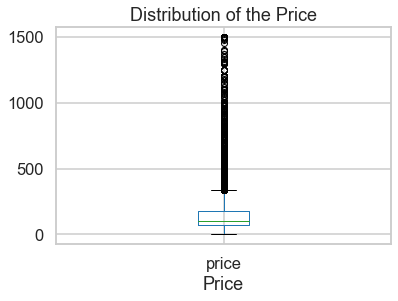

In [50]:
# Replotting the boxplot after the outlier treatments

data.boxplot(column = 'price')

plt.xlabel('Price')
plt.title('Distribution of the Price')

plt.show()

/Users/sukeerthig/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



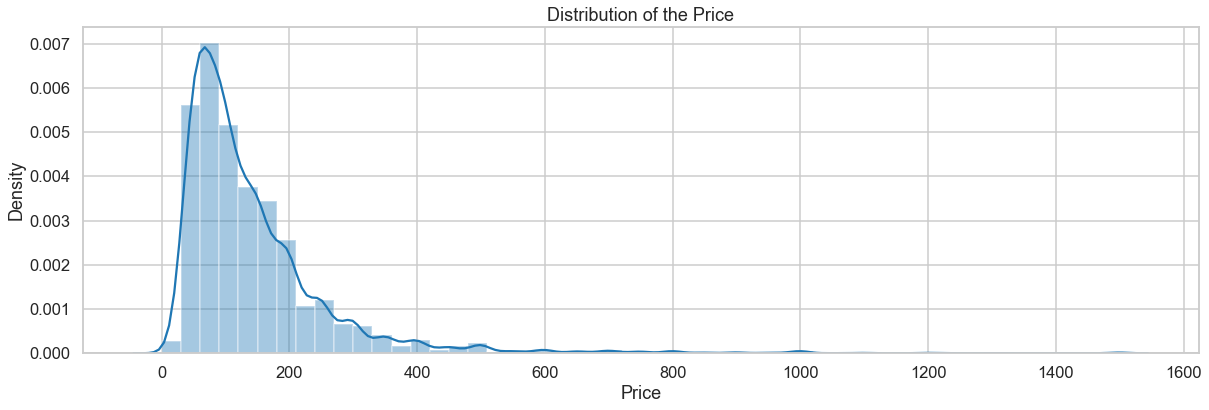

In [51]:
# Plotting the displot to see the distributions

plt.figure(figsize=(20,6))
sns.distplot(data['price'])

plt.xlabel('Price')
plt.title('Distribution of the Price')
plt.show()

After treating the outliers, based from the above graph, the price has been capped at the value of 1500usd as compared with 10000usd before the outlier treatments.

/Users/sukeerthig/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



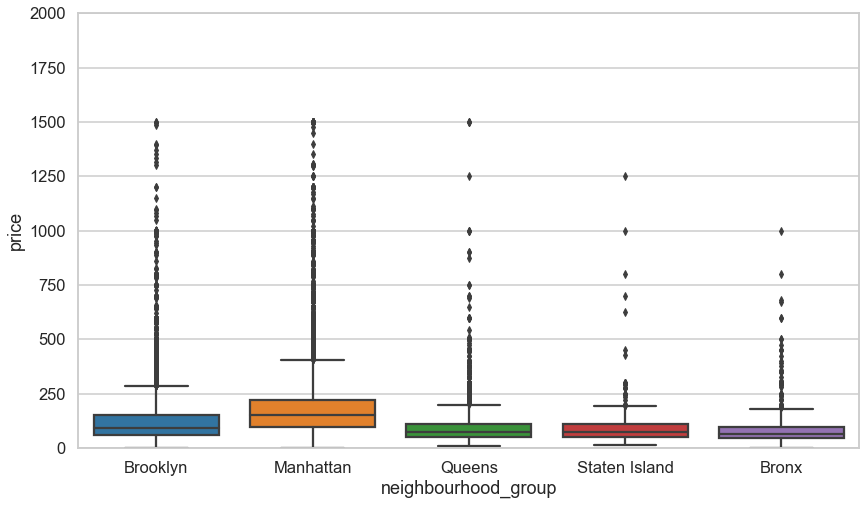

In [52]:
# Neighbourhood group and price
plt.figure(figsize=(14,8))
sns.boxplot(data.neighbourhood_group,data.price)
# sns.swarmplot(data.neighbourhood_group,data.price)
plt.ylim(0,2000)
plt.show()

### Minumum Nights

In [53]:
# Analysing the description

data['minimum_nights'].describe()

count    48756.000000
mean         6.983612
std         20.327452
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

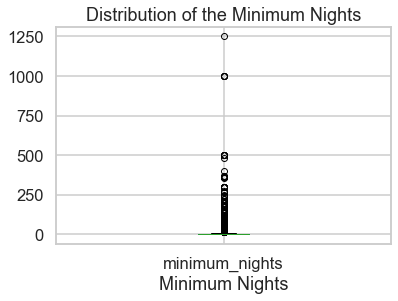

In [54]:
# Plotting boxplot to see the distribution of the data in the column

data.boxplot(column = 'minimum_nights')

plt.xlabel('Minimum Nights')
plt.title('Distribution of the Minimum Nights')

plt.show()

In [55]:
# Binning the Minimum Nights column

data['minimum_nights'].quantile([0,0.25,0.50,0.75,0.90,0.95,0.99,0.997])

0.000      1.00
0.250      1.00
0.500      3.00
0.750      5.00
0.900     28.00
0.950     30.00
0.990     42.45
0.997    120.00
Name: minimum_nights, dtype: float64

We will consider the values above 99.7% as an outliers, thus we will drop the values above 99.7% as per the rule of normal distribution.

In [56]:
# Dropping the value above 99.7 quantile.

data.drop(data[data['minimum_nights'] > data['minimum_nights'].quantile(0.997)].index, axis=0, inplace=True)


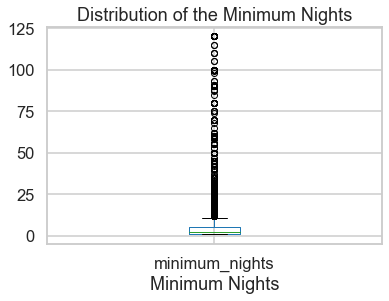

In [57]:
# Replotting the boxplot after the outlier treatments

data.boxplot(column = 'minimum_nights')

plt.xlabel('Minimum Nights')
plt.title('Distribution of the Minimum Nights')

plt.show()

/Users/sukeerthig/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



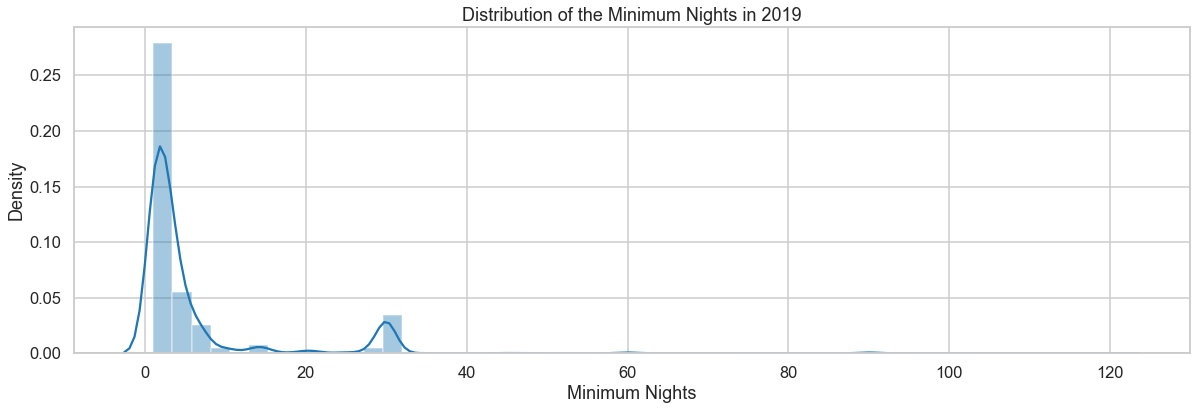

In [58]:
# Plotting the displot to see the distributions

plt.figure(figsize=(20,6))
sns.distplot(data['minimum_nights'])

plt.xlabel('Minimum Nights')
plt.title('Distribution of the Minimum Nights in 2019')
plt.show()

After replotting the boxplot and distribution plot, we can see that the value is being capped at 120 days, and the distribution can be clearly seen from the above graph.

In [59]:
data.to_csv("AB_NYC_2019_updated.csv", index=False)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
